# Ensemble

- 여러개의 분류 모델을 조합해서 더 나은 성능을 내는 방법

In [1]:
# RandomForest : DecisionTree를 단일 모델 조합해서 예측을 실행하는 모델
from sklearn import datasets
import numpy as np
np.random.seed(5)

In [5]:
# 손글씨 데이터
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [4]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
## DecisionTree를 이용한 10번의 교차 검증 10번 실시 ==> 정확도 보려고 
from sklearn import tree
from sklearn.model_selection import cross_val_score

cv_scores = []
cv = tree.DecisionTreeClassifier()
for i in range(10):
    score = cross_val_score(cv, features, labels, cv = 10, scoring='accuracy')
    cv_scores.append(score.mean())

cv_scores

[0.8280229671011794,
 0.8235630043451273,
 0.8224674115456239,
 0.8235692116697703,
 0.8341464928615766,
 0.8185692116697704,
 0.8241247672253259,
 0.8180136561142148,
 0.8235630043451272,
 0.8258038485412786]

In [10]:
## RandomForest를 이용한 10번의 교차 검증 10번 실시 ==> 정확도 보려고 
from sklearn.ensemble import RandomForestClassifier

rf_scores = []
rf = RandomForestClassifier()
for i in range(10):
    score = cross_val_score(rf, features, labels, cv = 10, scoring='accuracy')
    rf_scores.append(score.mean())

rf_scores

[0.9482433271260087,
 0.9532650527622595,
 0.9499130974549969,
 0.9543668528864059,
 0.9526970825574177,
 0.9387740533829918,
 0.9493606455617629,
 0.9460273122284295,
 0.9504686530105524,
 0.9510273122284294]

In [11]:
def cross_validation(classifier, features, labels):
    cv_scores=[]
    for i in range(10):
        score = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(score.mean())
    return cv_scores

In [12]:
# Decision Tree

dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)
dt_cv_scores

[0.8274705152079453,
 0.8336064556176288,
 0.8347020484171322,
 0.8191216635630043,
 0.8257976412166356,
 0.8291495965238982,
 0.8263531967721912,
 0.8241402855369337,
 0.8258007448789572,
 0.8246648044692737]

In [16]:
# RandomForest
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)
rf_cv_scores

[0.9482433271260087,
 0.9493513345747981,
 0.9487957790192427,
 0.9526846679081314,
 0.9521384233395406,
 0.951576660459342,
 0.954925512104283,
 0.9487988826815641,
 0.9487957790192427,
 0.94768156424581]

### RandomForest 와 DecisionTree 의 정확도 시각화

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

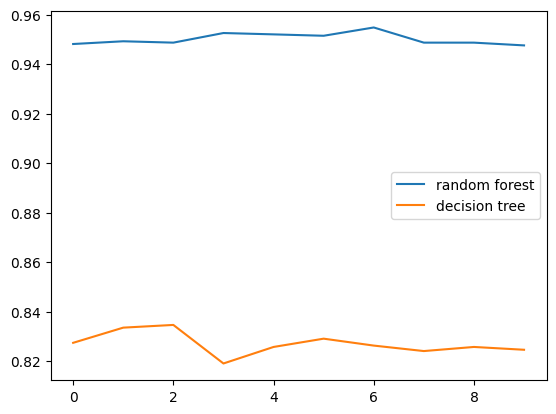

In [18]:
cv_list = {'random forest': rf_cv_scores, 'decision tree': dt_cv_scores}
df = pd.DataFrame(cv_list)
df.plot()
plt.show()

### Voting ensemble
: 단일 모델을 앙상블 하여 더 나은 예측을 하는 모델 생성

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2)

In [22]:
# 1) 단일 모델의 정확도 측정
# DecisionTree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
dtree.score(X_test, Y_test)

0.8555555555555555

In [23]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.9666666666666667

In [24]:
# SVM
from sklearn.svm import SVC
svm = SVC(probability=True).fit(X_train, Y_train)
svm.score(X_test,Y_test)

0.9805555555555555

2) Hard voting
: 각각의 분류기의 예측값들을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식

In [28]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators = [('decision_tree',dtree),('KNN',knn),('SVM',svm),],
    weights =[1,1,1],
    voting = 'hard', 
).fit(X_train, Y_train)
voting_clf.score(X_test,Y_test)

0.9722222222222222

3) SoftVoting
: 각각의 분류모델을 활용하여 보든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종 결론을 내리는 방식

In [29]:
voting_clf = VotingClassifier(
    estimators = [('decision_tree',dtree),('KNN',knn),('SVM',svm),],
    weights =[1,1,1],
    voting = 'soft',
).fit(X_train, Y_train)
voting_clf.score(X_test,Y_test)

0.9777777777777777